[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ZeBang/pytorch)

Good References for Pytorch:
    
Deep Learning with PyTorch: A 60 Minute Blitz
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

PyTorch Fundamentals by Microsoft
https://learn.microsoft.com/en-us/training/paths/pytorch-fundamentals/

## A single Layer Network on the Hitters Data

In [1]:
import pandas as pd
import numpy as np
import random
import math
import torch
from torch.utils import data

**Load Data**

In [2]:
random.seed(13)
torch.manual_seed(13) 

Gitters = pd.read_csv('Gitters.csv')
n = Gitters.shape[0]

ntest = math.trunc(n / 3)
testid = random.sample(range(n), ntest)
trainid = [i for i in range(n) if i not in testid]
## training and testing split
x_train = torch.from_numpy(Gitters.iloc[trainid,:-1].to_numpy()).float()
y_train = torch.from_numpy(Gitters.iloc[trainid,-1].to_numpy().reshape(-1, 1)).float()
x_test = torch.from_numpy(Gitters.iloc[testid,:-1].to_numpy()).float()
y_test = torch.from_numpy(Gitters.iloc[testid,-1].to_numpy().reshape(-1, 1)).float()

Most common way is first to construct a datatype called "dataset", then create a dataloader. see details
https://pytorch.org/docs/stable/data.html#

In [3]:
dataset = data.TensorDataset(x_train, y_train)  # create your dataset
data_iter = data.DataLoader(dataset, batch_size=32, shuffle=True)  # create your dataloader

**Build Network**

In [4]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, 1)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

**Set Parameters**

In [5]:
batch_size = 32
input_size = 20
epochs = 20

net = Net(input_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=2e-5)

**Training**

In [6]:
torch.manual_seed(13) 
for epoch in range(epochs):
    loss_epoch = 0
    for x,y in data_iter:
        optimizer.zero_grad()
        loss = loss_function(net(x), y)
        loss.backward()
        optimizer.step()
        loss_epoch += loss.item()
    print(f'epoch {epoch + 1}, loss {loss_epoch:f}')

epoch 1, loss 3458109.843750
epoch 2, loss 3805670.062500
epoch 3, loss 3497083.093750
epoch 4, loss 3578656.531250
epoch 5, loss 3363636.906250
epoch 6, loss 3298996.437500
epoch 7, loss 3435200.500000
epoch 8, loss 3191751.718750
epoch 9, loss 2716008.718750
epoch 10, loss 2349952.875000
epoch 11, loss 2052268.867188
epoch 12, loss 1743638.703125
epoch 13, loss 1733356.781250
epoch 14, loss 1215140.343750
epoch 15, loss 1385267.812500
epoch 16, loss 1315822.890625
epoch 17, loss 1126842.882812
epoch 18, loss 1135631.921875
epoch 19, loss 1177384.781250
epoch 20, loss 1199896.296875


**Testing**

In [7]:
pred = net(x_test)
loss_function(pred, y_test).item()

144611.671875

## Multilayer Network on the MNIST Digit Data

In [1]:
import numpy as np
import pandas as pd

import torch
import torchvision
import torch.nn as nn
from torchvision.transforms import transforms
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

**Load data**

In [40]:
## Loading the dataset using Pytorch Dataset
train_dataset=torchvision.datasets.MNIST('./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST('./data',train=False,transform=transforms.ToTensor(),download=True)

## Data loader for further operation.
train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100,shuffle=True)
test_dataloader=torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100,shuffle=True)

In [3]:
## see the shape of the data data that has been passed in batch
data=iter(train_dataloader)
samples,labels=next(data)
print(f"number of samples {samples.shape}")
print(f"number of labels {labels.shape}")

number of samples torch.Size([100, 1, 28, 28])
number of labels torch.Size([100])


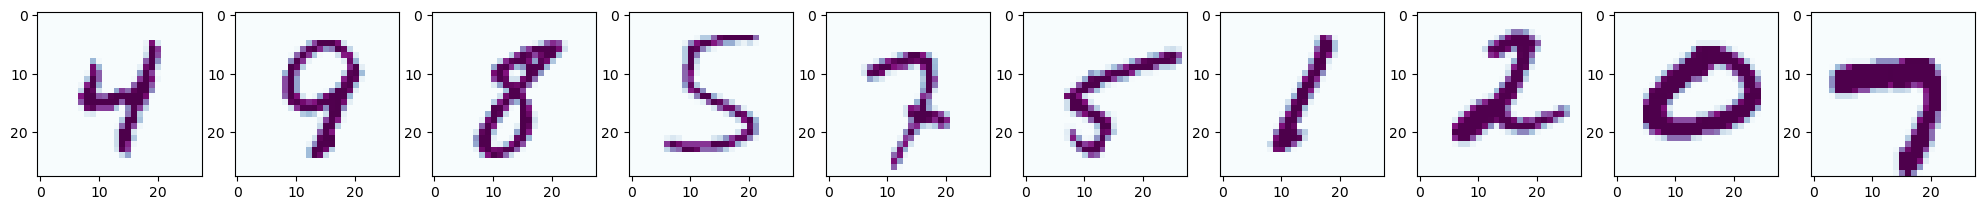

In [25]:
## Printing Images from dataset
plt.figure(figsize=(25,8))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(samples[i][0], 'BuPu')
plt.show()

**Build Network**

In [34]:
class MNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28, 256)
        self.fc2=nn.Linear(256, 128)
        self.fc3=nn.Linear(128, 10)
        self.drop1 = nn.Dropout(0.4)
        self.drop2 = nn.Dropout(0.3)
    def forward(self,x):
        x = self.drop1(F.relu(self.fc1(x)))
        x = self.drop2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

**Set Parameters**

In [44]:
epochs = 20

net = MNIST()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

**Training**

In [45]:
for epoch in range(epochs):
    loss_epoch = 0
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.reshape(-1, 28*28)  # convert matrix image data into vector
        optimizer.zero_grad()
        loss = loss_function(net(images), labels)
        loss.backward()
        optimizer.step()
        loss_epoch += loss.item()
    print(f'epoch {epoch + 1}, loss {loss_epoch:f}')

epoch 1, loss 1265.748399
epoch 2, loss 671.170079
epoch 3, loss 414.155360
epoch 4, loss 336.781514
epoch 5, loss 295.407463
epoch 6, loss 270.320931
epoch 7, loss 250.297567
epoch 8, loss 234.539415
epoch 9, loss 220.668807
epoch 10, loss 209.686743
epoch 11, loss 198.679632
epoch 12, loss 189.890658
epoch 13, loss 181.641917
epoch 14, loss 174.975931
epoch 15, loss 167.886870
epoch 16, loss 161.933508
epoch 17, loss 154.060923
epoch 18, loss 150.028926
epoch 19, loss 145.244806
epoch 20, loss 139.440578


**Testing**

In [46]:
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=net(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples=labels.shape[0]
        n_correct=(prediction==labels).sum().item()
    accuracy=(n_correct/n_samples)*100
print(f'getting the accuracy of {accuracy}% on validation set')

getting the accuracy of 96.0% on validation set


## Convolutional Neural Networks

In [47]:
import torch
import torchvision
import torchvision.transforms as transforms

**Load data**

In [50]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = trainset.classes

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data\cifar-100-python.tar.gz to ./data
Files already downloaded and verified


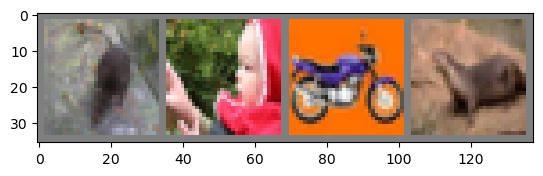

shrew baby  motorcycle otter


In [60]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**Build Network**

Same as Figure 10.8 on Page 416

In [120]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class netCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 3, padding='same')  # 3 input image channel, 6 output channels, 3x3 square convolution
        self.conv2 = nn.Conv2d(6, 12, 3, padding='same')
        self.conv3 = nn.Conv2d(12, 24, 3, padding='same')
        # affine operation: y = Wx = b
        self.fc1 = nn.Linear(24*4*4, 500)
        self.fc2 = nn.Linear(500, 100)
        # pooling
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
    
# (4x96 and 216x500)

**Set Parameters**

In [123]:
import torch.optim as optim

epochs = 20

net = netCNN()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

**Training**

In [124]:
for epoch in range(epochs):  # loop over the dataset multiple times
    loss_epoch = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        loss_epoch += loss.item()
    print(f'epoch {epoch + 1}, loss {loss_epoch:f}')

epoch 1, loss 53812.149960
epoch 2, loss 43873.118951
epoch 3, loss 37707.387898
epoch 4, loss 34170.441369
epoch 5, loss 31627.399753
epoch 6, loss 29671.162925
epoch 7, loss 27888.076325
epoch 8, loss 26217.966709
epoch 9, loss 24769.054906
epoch 10, loss 23423.372727
epoch 11, loss 22089.367554
epoch 12, loss 21035.582232
epoch 13, loss 19875.374408
epoch 14, loss 19233.207716
epoch 15, loss 18437.358082
epoch 16, loss 17846.456480
epoch 17, loss 17210.287618
epoch 18, loss 16866.428960
epoch 19, loss 16436.248216
epoch 20, loss 16169.184950


**Testing**

In [125]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 27 %


## Using Pretrained CNN Models

The ISL book introduced how to load the pretrained CNN model, resnet18, in R. Here we show how to load resnet18 in Pytorch.

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

Here’s a sample execution.

In [128]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch) # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)

In [133]:
import wget
# Download ImageNet labels
url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
wget.download(url)

100% [..............................................................................] 10472 / 10472

'imagenet_classes.txt'

In [134]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.8846226930618286
Arctic fox 0.045805007219314575
white wolf 0.04427620768547058
Pomeranian 0.005621352232992649
Great Pyrenees 0.004652009811252356


Before we move on, just let you know Pytorch support many data set and can be loaded using its own functions:

If you are interested in how to load data in Pytorch, see:

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html


## Recurrent Neural Networks

More details about RNN network in Pytorch can be found:

https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_recurrent_neuralnetwork/

The Pytorch support many text dataset:

https://pytorch.org/data/beta/examples.html#text

The book used IMDb Document text data. For IMDB sentiment analysis in Pytorch, we can see:

https://github.com/bentrevett/pytorch-sentiment-analysis

Following we showed a simple RNN with two hidden layer + ReLU, using MNIST data.

**Load Data**

In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


## LOADING DATASET
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())


## MAKING DATASET ITERABLE
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

**Build Network**

In [9]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, hn = self.rnn(x, h0.detach())

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

**Set Parameters**

In [10]:
input_dim = 28
hidden_dim = 100
layer_dim = 2 
output_dim = 10
seq_dim = 28  

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

**Training**

In [11]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        model.train()
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, seq_dim, input_dim).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Resize images
                images = images.view(-1, seq_dim, input_dim)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2976267337799072. Accuracy: 11.350000381469727
Iteration: 1000. Loss: 2.278022289276123. Accuracy: 14.40999984741211
Iteration: 1500. Loss: 2.230741024017334. Accuracy: 21.030000686645508
Iteration: 2000. Loss: 1.1895577907562256. Accuracy: 58.34000015258789
Iteration: 2500. Loss: 0.7602993845939636. Accuracy: 73.3499984741211
Iteration: 3000. Loss: 0.4741747975349426. Accuracy: 80.63999938964844


### Sequential Models for Document Classification


The following showed an example by AG_NEWS data,

https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html

**Load Data**

In [1]:
import torch
from torchtext.datasets import AG_NEWS
train_iter = iter(AG_NEWS(split='train'))

In [3]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = AG_NEWS(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

train_iter = AG_NEWS(split='train')
dataloader = DataLoader(train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch)

**Build Network**

In [4]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

**Set Parameters**

In [5]:
train_iter = AG_NEWS(split='train')
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

**Training**

In [6]:
import time

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [7]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
train_iter, test_iter = AG_NEWS()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.720
| epoch   1 |  1000/ 1782 batches | accuracy    0.868
| epoch   1 |  1500/ 1782 batches | accuracy    0.883
-----------------------------------------------------------
| end of epoch   1 | time:  6.96s | valid accuracy    0.886 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.904
| epoch   2 |  1000/ 1782 batches | accuracy    0.906
| epoch   2 |  1500/ 1782 batches | accuracy    0.908
-----------------------------------------------------------
| end of epoch   2 | time:  6.89s | valid accuracy    0.850 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.924
| epoch   3 |  1000/ 1782 batches | accuracy    0.929
| epoch   3 |  1500/ 1782 batches | accuracy    0.930
-----------------------------------------------------------
| end of epoch   3 | time:  6.80s | valid accuracy    0.908 
-------------------------------

**Testing**

In [8]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.907


### Time Series Prediction with LSTM Using PyTorch

Using Shampoo Sales Dataset and Airplane Passengers Dataset.


**Load Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

Download Dataset

In [11]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv", "shampoo.csv")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
    
url, filename = ("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", "airline-passengers.csv")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [5]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

Data Plot

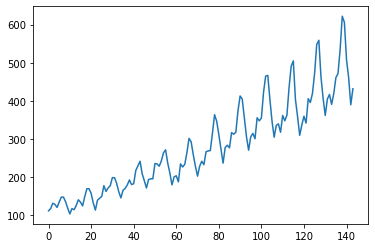

In [6]:
training_set = pd.read_csv('airline-passengers.csv')
#training_set = pd.read_csv('shampoo.csv')

training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Shampoo Sales Data')
plt.show()

**Build Network**

In [7]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

**Training**

In [8]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.87787
Epoch: 100, loss: 0.01541
Epoch: 200, loss: 0.01242
Epoch: 300, loss: 0.00798
Epoch: 400, loss: 0.00315
Epoch: 500, loss: 0.00299
Epoch: 600, loss: 0.00287
Epoch: 700, loss: 0.00275
Epoch: 800, loss: 0.00264
Epoch: 900, loss: 0.00254
Epoch: 1000, loss: 0.00244
Epoch: 1100, loss: 0.00234
Epoch: 1200, loss: 0.00225
Epoch: 1300, loss: 0.00216
Epoch: 1400, loss: 0.00207
Epoch: 1500, loss: 0.00197
Epoch: 1600, loss: 0.00188
Epoch: 1700, loss: 0.00181
Epoch: 1800, loss: 0.00176
Epoch: 1900, loss: 0.00174


**Testing**

Shampoo Sales Dataset

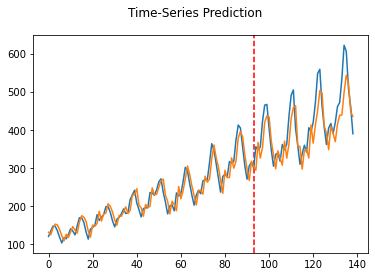

In [9]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

Airplane Passengers Dataset

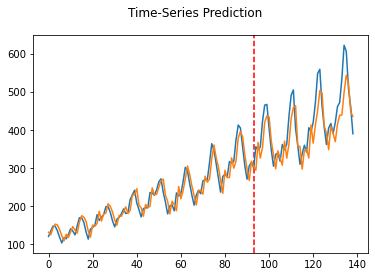

In [10]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()